# Завдання

- Отримати базові навички роботи в оточенні Google Colab.
- Розробити граф-дорогу, на основі якої буде виконано подальші
лабораторні роботи.

# Виконання

In [214]:
from typing import List
from random import choice
from copy import deepcopy

import networkx as nx
import matplotlib.pyplot as plt

In [215]:
class Graph:
    def __init__(self, n: int = 5):
        self.double_n = n * n
        self.n = n
        self.edgesList: List[list] = [[] for _ in range(self.double_n)]
        self.edges_n = 0
        self._create_edges()
        self.active_node = 0
        self.history = []

    def _create_edges(self): 
        for start in range(self.double_n):
            for end in range(self.double_n):
                if abs(end - start) == self.n:
                    self.edgesList[start].append(end)
                    self.edges_n += 1
                if abs(end - start) == 1:
                    if (start % self.n == 0 and (end + 1) % self.n == 0) or (end % self.n == 0 and (start + 1) % self.n == 0):
                        continue
                    self.edgesList[start].append(end)
                    self.edges_n += 1

    def delete_edges(self, delete_n: int):
        if delete_n > self.edges_n / 2 + 1 - self.double_n:
            raise Exception(f'Delete number must be less or equal than {int(self.edges_n / 2 + 1 - self.double_n)}')
        for _ in range(delete_n):
            edges = []
            while True:
                temp_list = deepcopy(self.edgesList)
                edgesList_copy = deepcopy(self.edgesList)
                point = choice(range(len(temp_list)))
                connected_point = choice(temp_list[point])
                if [point, connected_point] in edges:
                  continue
                edges.append([point, connected_point])
                temp_list[point].remove(connected_point)
                temp_list[connected_point].remove(point)
                self.edgesList = temp_list
                if self.isStronglyConnected():
                    print(point, connected_point)
                    break
                self.edgesList = edgesList_copy
        self.edges_n -= delete_n * 2

    
    def _DFS(self, v, visited):
        visited[v] = True
        for u in self.edgesList[v]:
            if not visited[u]:
                self._DFS(u, visited)

    def isStronglyConnected(self):
        for i in range(self.double_n):
            visited = [False] * self.double_n
            self._DFS(i, visited)
            for b in visited:
                if not b:
                    return False
        return True

    def __make_graph(self):
      self.G=nx.Graph()
      self.positions = {}
      counter = 0
      for i in range(n-1, -1, -1):
        for j in range(n):
          self.G.add_node(counter)
          self.positions[counter] = (j, i)
          counter += 1
      for point, connections in enumerate(self.edgesList):
        for connection in connections:
          self.G.add_edge(point, connection)
    
    def draw(self):
      self.__make_graph()
      colors = ['orange'] * self.double_n
      colors[self.active_node] = 'red'
      nx.draw(self.G, pos=self.positions, node_color=colors, with_labels=True, font_weight='bold', font_color='white')
      plt.show()

    def walking(self, end: int, start: int = None):
      if start:
        self.active_node = start
      if end == self.active_node:
        self.draw()
        self.history = []
        print('You have ended the walking')
        return
      edge = choice(list(self.G.edges(self.active_node)))
      print(edge)
      self.draw()
      self.history.append(edge)
      return self.walking(start=edge[1], end=end)


## Ініціалізація графу

In [216]:
n = 4

In [217]:
graph = Graph(n)

## Відображення графу

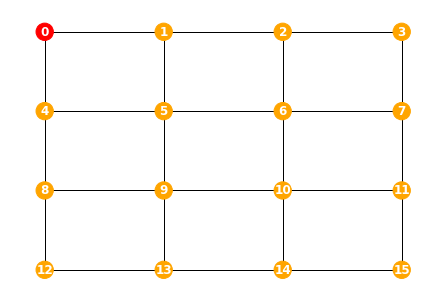

In [218]:
graph.draw()

## Видалення ребер

In [219]:
graph.delete_edges(9)

8 9
7 3
7 11
2 1
15 11
1 0
10 9
9 13
8 4


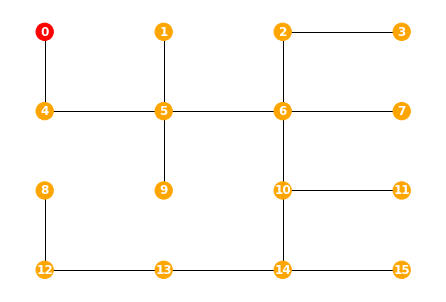

In [220]:
graph.draw() 

(0, 4)


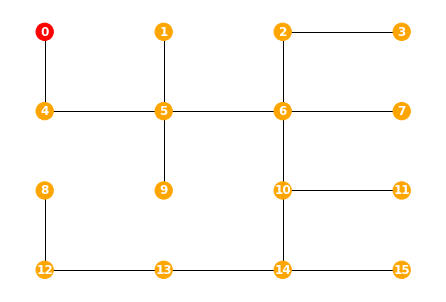

(4, 0)


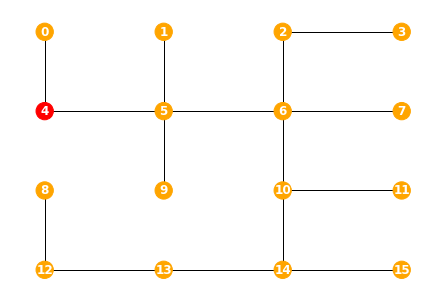

(4, 5)


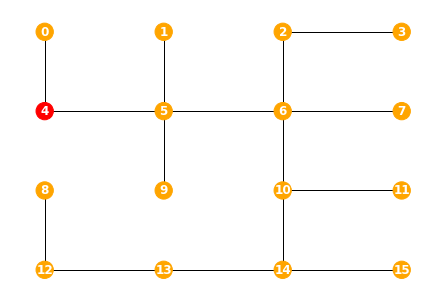

(5, 4)


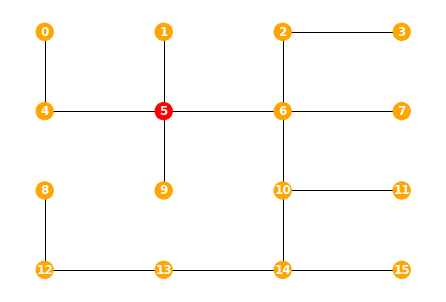

(4, 0)


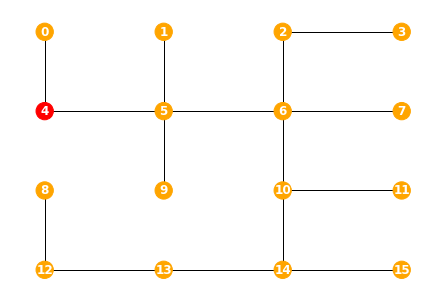

(4, 5)


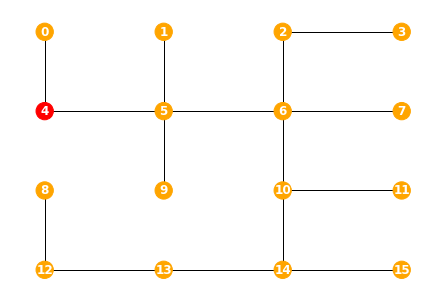

(5, 1)


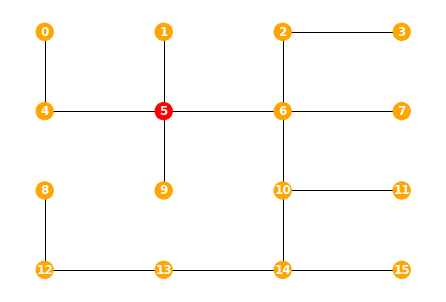

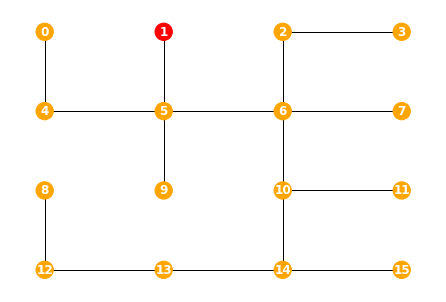

You have ended the walking


In [221]:
graph.walking(1)